<a href="https://colab.research.google.com/github/yashjonjale/Lane-Finder/blob/main/appr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

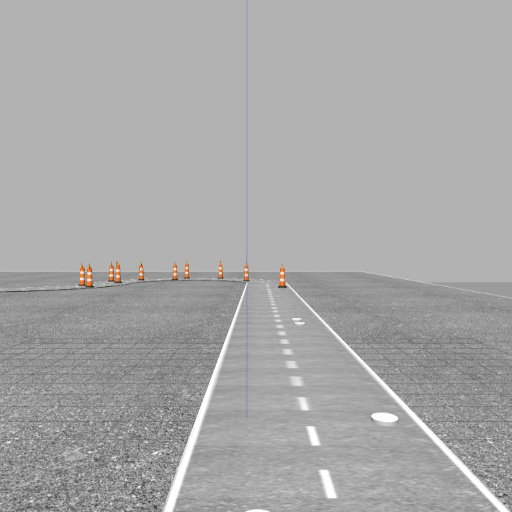

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("drive/MyDrive/input_images/in_img1.jpg")
cv2_imshow(img)

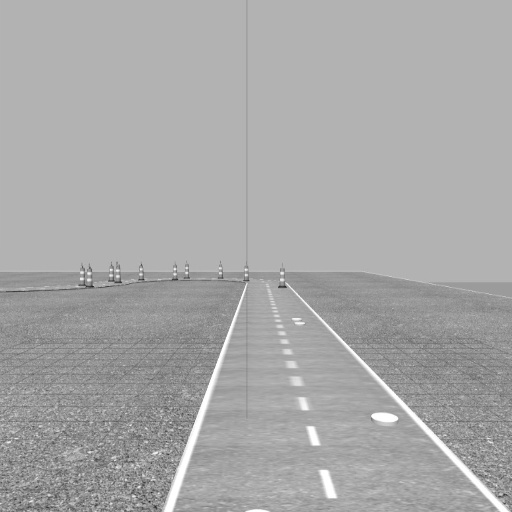

In [ ]:
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(g_img)

In [ ]:


# Define the triangle vertices
# x1 = 100
# y1 = 50
# x2 = 200
# y2 = 150
# x3 = 150
# y3 = 250

# # Create a mask image
# mask = np.zeros_like(img)


# # Draw the triangle on the mask
# cv2.fillPoly(mask, np.array([[(x1, y1), (x2, y2), (x3, y3)]]), (255, 255, 255))
# cv2_imshow(mask)
# # Apply bitwise AND operation
# tri_img = cv2.bitwise_and(img, mask)

# # Find the bounding box of the triangle
# x, y, w, h = cv2.boundingRect(np.array([[(x1, y1), (x2, y2), (x3, y3)]]))

# # Crop the image using numpy slicing
# cropped_img = tri_img[y:y+h, x:x+w]

# # Display the cropped image
# cv2_imshow(cropped_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
def region_selection(image):
    """
    Determine and cut the region of interest in the input image.
    Parameters:
        image: we pass here the output from canny where we have
        identified edges in the frame
    """
    # create an array of the same size as of the input image
    mask = np.zeros_like(image)
    # if you pass an image with more then one channel
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    # our image only has one channel so it will go under "else"
    else:
          # color of the mask polygon (white)
        ignore_mask_color = 255
    # creating a polygon to focus only on the road in the picture
    # we have created this polygon in accordance to how the camera was placed
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0, rows * 1]
    top_left     = [cols * 0.3, rows * 0.6]
    bottom_right = [cols * 1, rows * 1]
    top_right    = [cols * 0.7, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    # filling the polygon with white color and generating the final mask
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    # performing Bitwise AND on the input image and mask to get only the edges on the road
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image



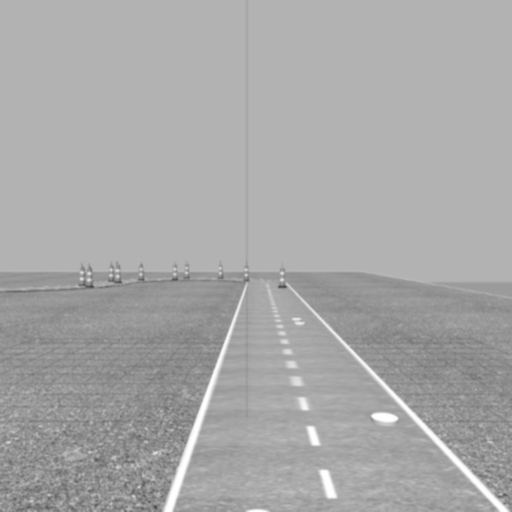

In [ ]:
img_blur = cv2.GaussianBlur(g_img, (3, 3), 0)
cv2_imshow(img_blur)

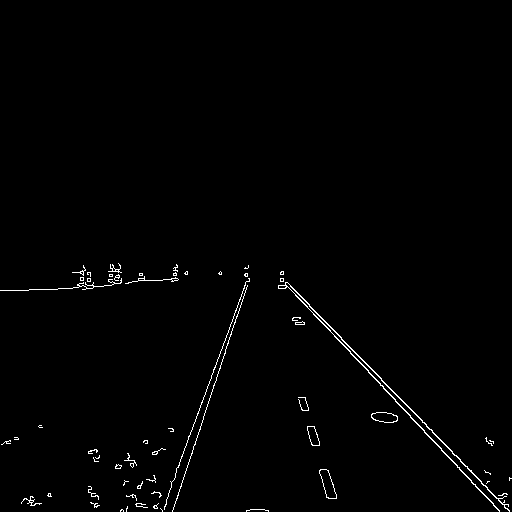

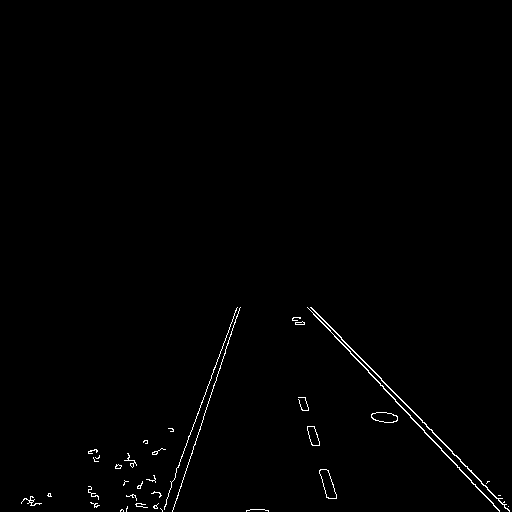

In [ ]:
img_edges= cv2.Canny(img_blur, 100, 200, L2gradient=True)

img_regsel_afed=region_selection(img_edges)
cv2_imshow(img_edges)
cv2_imshow(img_regsel_afed)


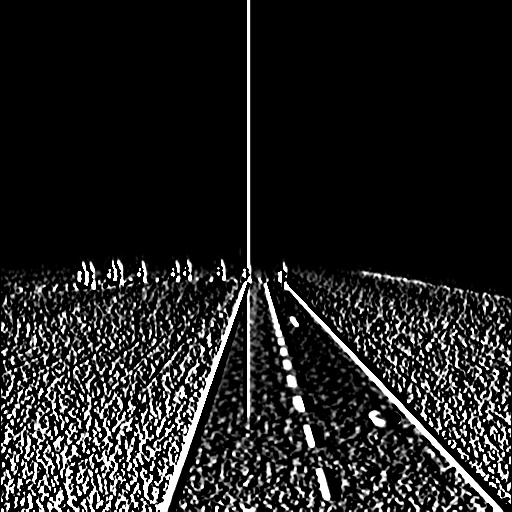

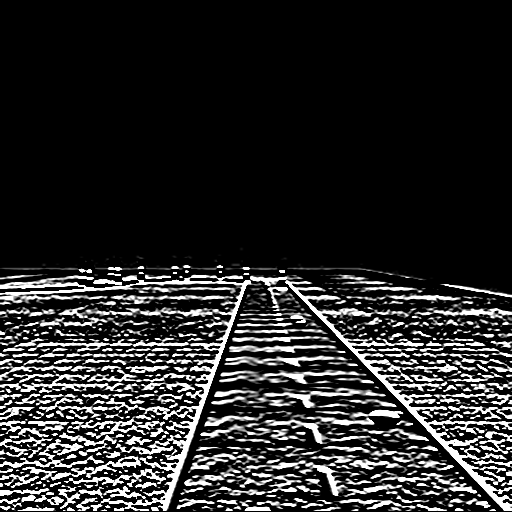

In [ ]:
# Sobel Edge Detection on the X axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
cv2_imshow(sobelx)
# Sobel Edge Detection on the Y axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
cv2_imshow(sobely)

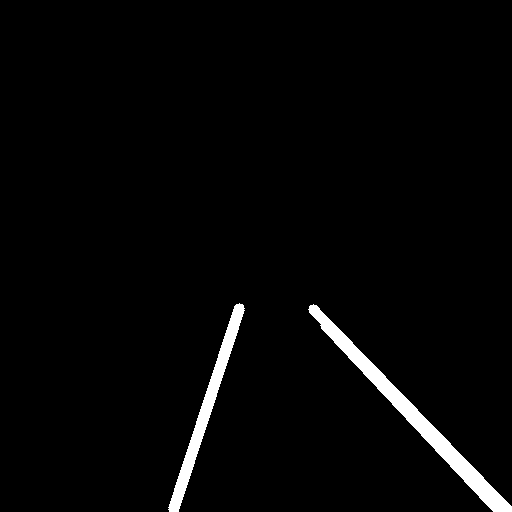

In [ ]:
rho = 1
theta = np.pi/180
threshold = 10
min_line_length = 20
max_line_gap = 30
line_image = np.copy(g_img)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(img_regsel_afed, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
i=0
for line in lines:
    if i > 2 :
        break
    i+=1
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

cv2_imshow(line_image)